## Homework 2
*For any questions or concerns please email your instructor at `smanna@scu.edu`*
### Due - 05/04/2020 - 11:59p - 20 points

**Name:** Jeffrey Lin

**Email:**  jlin7@scu.edu

**Objectives:** The main aim of this homework is to make you conversant with `Perceptron Training Rule` and use it as a simple binary classifier.

**Submission Instructions:** 
* Please download `hw2.ipynb`, `train.csv`, and `test.csv` files and insert cells in the `hw2.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `hw2`.
* Please make sure you type your `Name` and `Email` on top of your submission file in the placeholder above. 

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. 

### Problem Statement
You are given a dataset of different `Iris` flower species. The original [dataset](https://archive.ics.uci.edu/ml/datasets/iris) has detailed description of all the characteristics of the flowers. Please feel free to visit the original page to know more about the dataset. Your task is to develop a simple linear binary classifier using `perceptron training rule` and `delta rule using batch gradient descent` to categorize the flowers based on their species.

**Adaptation**: To make the dataset work for this *homework*, we have modified the original dataset. You can use `train.csv` to train the parameters of your model and then use `test.csv` to test your model on some unknown dataset.

**Evaluation**: We have set aside another dataset similar to `test.csv` which will not be disclosed to you. We will use that dataset to evaluate your algorithm. This is just to make sure that you do not have any hard-coded parameters in your code.

**Note**: Please make sure you have proper comments and explanation/justification of the steps you have coded. Please feel to add extra cells to complete all the `TODO` stubs. You are allowed to create your own utility functions to support your code.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [2]:
# Define headers since the dataset does not have any headers
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [3]:
# Import csv file into pandas dataframe'
# TODO
fnametrain ='train.csv'
traindata = pd.read_csv(fnametrain, names = col_names)

In [4]:
# print first 10 rows of the training data
# TODO
traindata.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.794872,0.410256,0.756410,0.307692,0
1,0.551282,0.371795,0.153846,0.012821,1
2,0.628205,0.243590,0.435897,0.115385,1
3,0.628205,0.410256,0.166667,0.012821,1
4,0.628205,0.397436,0.141026,0.012821,1
5,0.820513,0.371795,0.653846,0.243590,0
6,0.782051,0.358974,0.538462,0.153846,1
7,0.628205,0.423077,0.192308,0.038462,1
8,0.730769,0.333333,0.512821,0.115385,1
9,0.910256,0.397436,0.756410,0.217949,0


In [5]:
# find the number of training data
# TODO
traindata.size

560

In [6]:
# check the data types for each columns of your dataset
# TODO
traindata.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [7]:
# Separating features and store in X_train
# TODO
X_train = traindata[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [8]:
# Assigning y_train (species) from the dataset
# TODO
y_train = traindata['species']

In [9]:
# find the number of y values in the training dataset
# TODO
y_train.size

112

**Activation functions**: You have to implement two different activation functions, `sgn` and `sigmoid`.

In [10]:
# implementation of sign activation
#def sgn(x): # if x > 0 then return 1, and 0 otherwise
# TODO
def sgn(x):
    if x > 0:
        return 1
    else:
        return 0

In [11]:
# implementation of sigmoid activation
#def sigmoid(x):
# TODO
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x)) 

**Training Rules**

In [12]:
NUM_FEATURES = 4

In [13]:
# implementation of perceptron training algorithm
def PTR(X, y, num_iter, learning_rate, activation_func):
    N, d = np.shape(X) # number of samples and number of features
    W = np.zeros(NUM_FEATURES, np.float32) # 2x1, weight
    b = np.zeros(1, np.float32) # 1x1
    for k in range(num_iter):
       for j in range(N): #N = Number of samples
         yHat_j = X.iloc[j, :].dot(W) + b # 1x2, 2x1
         yHat_j = activation_func(yHat_j) # activation function
         
         err = y[j] - yHat_j # error term
         deltaW = err * X.iloc[j, :]
         
         deltaB = err
         W = W + learning_rate * deltaW # if err = y - yHat, then W = W + lRate * deltW
         b = b + learning_rate * deltaB
    return W, b

In [14]:
# implementation of delta rule using batch gradient decent
def BGD(X, y, num_iter, learning_rate):
#     TODO
#    return W, b, cost 
    N, d = np.shape(X_train) # number of samples and number of features

    cost = np.zeros(num_iter) 
    W = np.zeros((NUM_FEATURES), np.float32) # 3x1, weight
    b = 0 # 1x1

    for k in range(num_iter):
        yHat = np.dot(X, W) + b
        err = y - yHat
        W += learning_rate * X.T.dot(err)
        b += learning_rate * err.sum() # err.sum() == np.ones((1, N)).dot(err)[0][0]
        cost[k] = (err**2).sum() / 2.0
    return W, b, cost 

In [15]:
# Learning parameters using Batch Gradient Descent for training
W_bgd, b_bgd, cost_bgd = BGD(X_train, y_train, 2500, 0.001) 
# try out with different num_iterations, and learning_rate

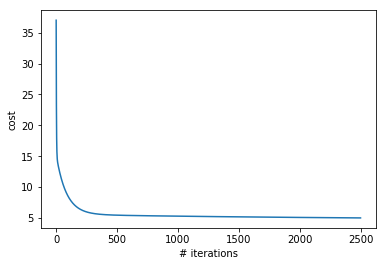

In [16]:
# plot cost (as computed in batch gradient descent)
# with `No. of iterations` in x-axis, and `Cost` in y-axis
# TODO
plt.plot(cost_bgd)
plt.xlabel("# iterations")
plt.ylabel("cost")
plt.show()

In [17]:
# Learning parameters using Perceptron training rule function
W_ptr, b_ptr = PTR(X_train, y_train, 1000, 0.01, sigmoid)
# try out with different num_iterations, and learning_rate

**Prediction Begins**: I have provided you with two utility functions `Identity` and `predict` which you will need to use it on test data.

In [18]:
# An activation, that does nothing. Used to disable activation_function.
def Identity(x):
    return x

# The neural network thinks.
def predict(x_test, weights, bias, activation_func=Identity):
    return activation_func(np.dot(x_test, weights) + bias)

In [19]:
# Read test data into pandas dataframe
# TODO
fnametest = 'test.csv'
testdata = pd.read_csv(fnametest, names = col_names)

In [20]:
# print first 10 rows of the test data
# TODO
testdata.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.858974,0.346154,0.602564,0.166667,1
1,0.794872,0.307692,0.615385,0.179487,1
2,0.794872,0.282051,0.551282,0.153846,1
3,0.974359,0.474359,0.846154,0.269231,0
4,0.717949,0.358974,0.525641,0.153846,1
5,0.756410,0.333333,0.641026,0.192308,1
6,0.730769,0.320513,0.500000,0.141026,1
7,0.858974,0.371795,0.692308,0.256410,0
8,0.615385,0.294872,0.410256,0.115385,1
9,0.705128,0.346154,0.615385,0.243590,0


In [21]:
# features of test
# Separating feature and output columns from the dataset and store in X_test
# TODO
X_test = testdata[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [22]:
# store actual output (target) into y_test
# TODO
y_test = testdata['species']

In [27]:
# Compute predictions with X_test
y_pred_ptr = predict(X_test, W_ptr, b_ptr, sigmoid) # feel free to explore results using `sgn` activation function
y_pred_bgd = predict(X_test, W_bgd, b_bgd)

In [28]:
print(y_pred_ptr)

[0.58694515 0.4808575  0.71698518 0.03355405 0.80956414 0.38230429
 0.85801345 0.17600084 0.95613271 0.3624916  0.99931483 0.83865706
 0.88376281 0.11654153 0.7057043  0.08417539 0.44118397 0.99946448
 0.79687306]


In [29]:
print(y_pred_bgd)

[0.49895535 0.47187252 0.58636082 0.06698166 0.57163822 0.40989641
 0.63387366 0.27738235 0.75646942 0.36266007 1.10316567 0.57897421
 0.66436456 0.20931521 0.49807417 0.2445012  0.39558643 1.0941766
 0.57924812]


**Evaluation Metrics** We will evaluate our predictions using `Root Mean Squared Error`

In [30]:
# Evaluate using RMSE
def RMSE(target, output):
    return math.sqrt(((target - output) ** 2).mean(axis=None))


In [31]:
rmse_ptr = RMSE(y_test, y_pred_ptr)
print('the rmse is: ', rmse_ptr)

('the rmse is: ', 0.28156946527540455)


In [32]:
rmse_bgd = RMSE(y_test, y_pred_bgd)
print('the rmse is: ', rmse_bgd)

('the rmse is: ', 0.3725836923415349)
